In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
cholafin = pd.read_csv('../data/low/CHOLAFIN.csv')
crompton = pd.read_csv('../data/low/CROMPTON.csv')
srf = pd.read_csv('../data/low/SRF.csv')
voltas = pd.read_csv('../data/low/VOLTAS.csv')
tatasteel = pd.read_csv('../data/low/TATASTEEL.csv')

In [3]:
close_df = pd.DataFrame()

close_df['Date'] = srf['Date']
close_df['CHOLAFIN'] = cholafin['Close']
close_df['CROMPTON'] = crompton['Close']
close_df['SRF'] = srf['Close']
close_df['VOLTAS'] = voltas['Close']
close_df['TATASTEEL'] = tatasteel['Close']

close_df = close_df.set_index('Date')

In [4]:
close_df

,CHOLAFIN,CROMPTON,SRF,VOLTAS,TATASTEEL
Date,,,,,
26/05/16,174.81,133.30,1235.65,338.35,309.83
27/05/16,177.06,132.45,1260.55,336.80,314.02
30/05/16,189.87,130.00,1302.65,339.55,307.11
31/05/16,195.11,132.30,1297.10,335.90,318.55
01/06/16,196.19,134.60,1287.85,333.35,316.45
...,...,...,...,...,...
20/05/21,570.00,383.65,6436.90,1008.90,1105.05
21/05/21,582.80,388.45,6451.80,999.85,1113.10
24/05/21,576.40,398.25,6409.55,996.60,1092.00


In [5]:
daily_ret = close_df.pct_change()
daily_ret = daily_ret.dropna()

In [6]:
volatility_df = daily_ret.rolling(window=252).std() * np.sqrt(252)

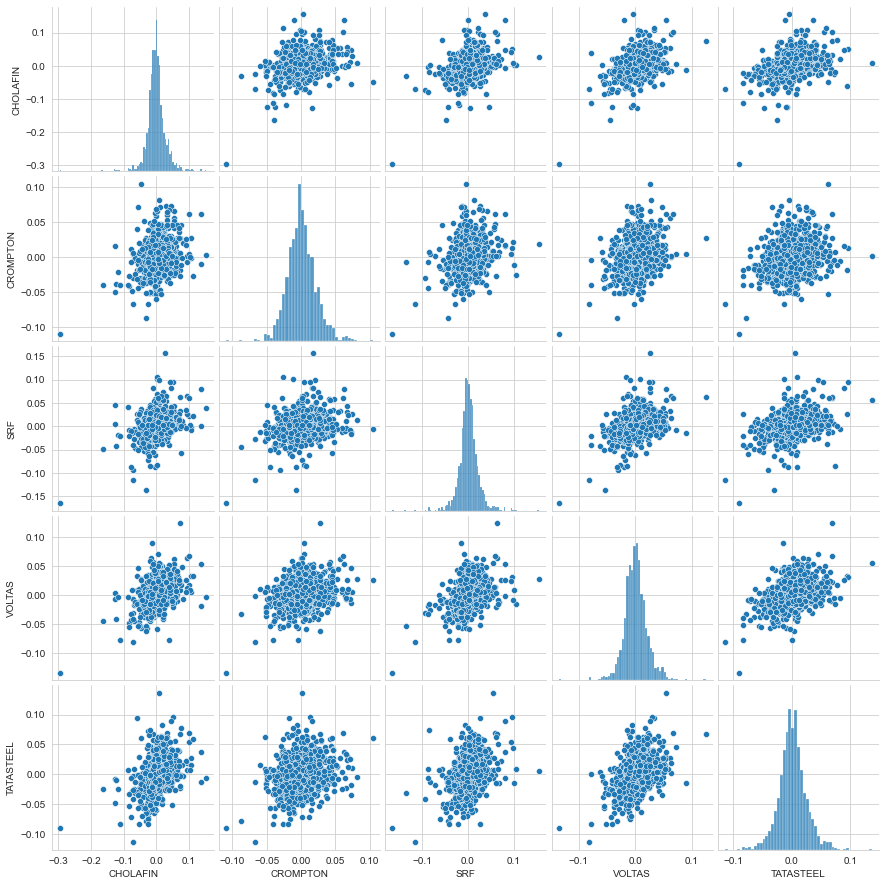

In [7]:
sns.pairplot(daily_ret)

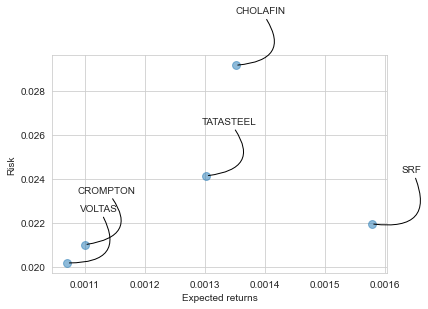

In [8]:
area = np.pi*20

plt.scatter(daily_ret.mean(), daily_ret.std(),alpha = 0.5,s =area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(daily_ret.columns, daily_ret.mean(), daily_ret.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.9', color = 'black'))

<AxesSubplot:xlabel='Date'>

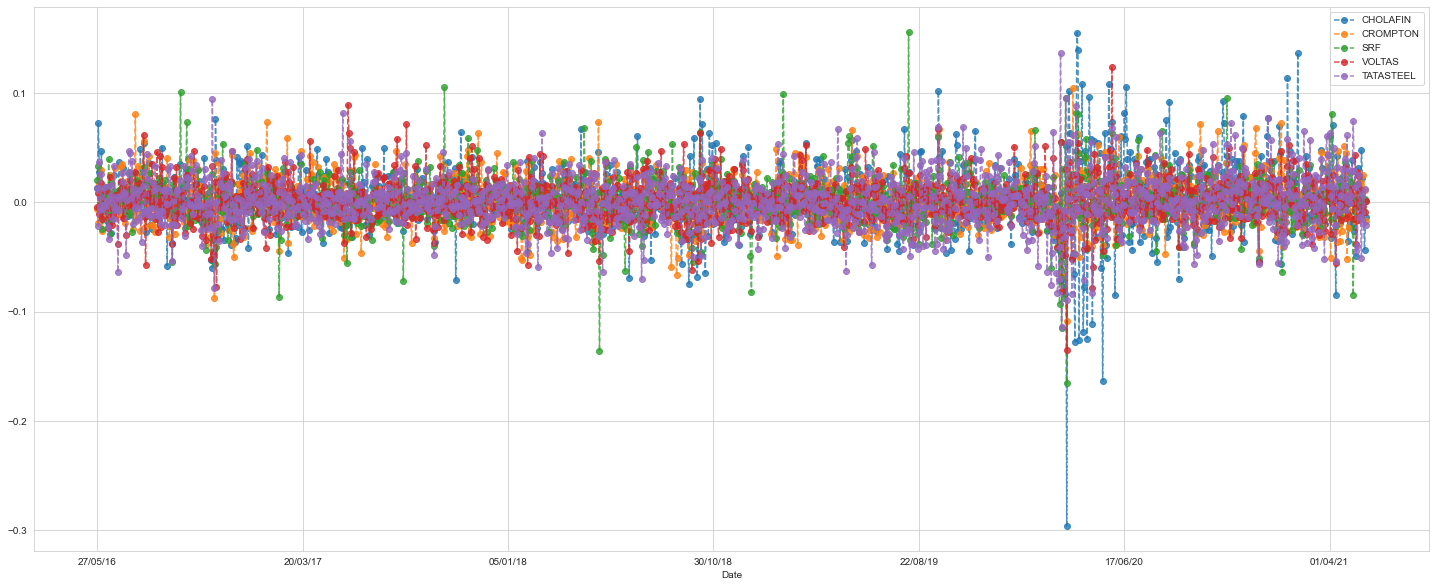

In [9]:
daily_ret.plot(figsize=(25,10),legend=True,linestyle='--',marker='o',alpha=0.8)

<AxesSubplot:xlabel='Date'>

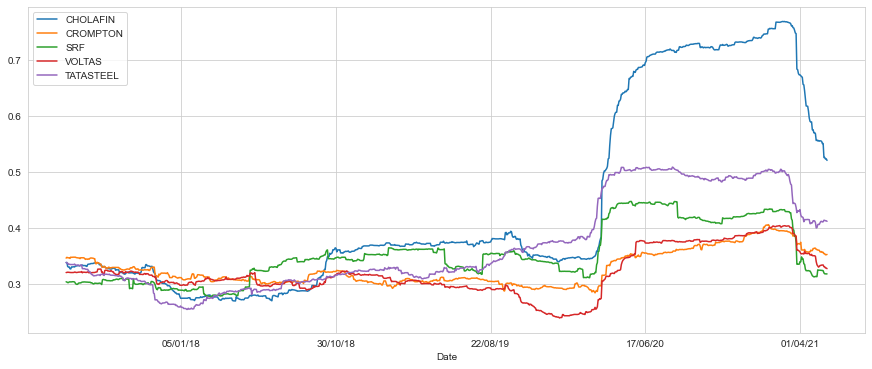

In [10]:
volatility_df.plot(figsize=(15, 6))